# Vector Store

- A vector store is a system designed to store and retrieve data represented as numerical vectors.

**Key Features**
1. **Storage**: Ensures that vectors and their associated metadata are retained, wheather
`in-memory` for quick lookups or `on-disk` for durability and large-scale use.

2. **Similarity Search**: Helps retrieve the vectors most similar to a query vector.

3. **Indexing**: Provide a data structure or method that enables fast similarity searches on high-dimensional vectors (e.g., approximate nearest neighbor lookups).

4. **CRUD Operations**: Manage the lifecycle of data- adding new vectors, reading them, updating existing entries, removing outdated vectors.

**Use-cases**

1. Semantic Search
2. RAG
3. Recommender Systems
4. Image/Multimedia Search

# Vector Store VS Vector Database

- ## **Vector Store**
  - - Typically refers to a lightweight library or service that focuses on storing vectors (embeddings) and performing similarity search.
   
    - May not include many traditional database features like transactions, rich query languages, or role-based access control.
   
    - Ideal for prototyping, smaller-scale applications
   
    - Examples: `FAISS` (where you store vectors and can query them by similarity, buy you handle persistence and scaling separately.

- ## **Vector Database**
  - - A full-fledged database system designed to store and query vectors.
   
    - Offers additional "Database-like" features:
   
    - - Distributed Architecture for horizontal scaling
      - Durability and persistence (replication, backup/restore)
      - Metadata handling (schemas, filters)
      - Potential for ACID or near-ACID guarantees
      - Authentication/ authorization and more advanced security
      
    - Geared for production environments with significant scaling, large datasets
   
    - Examples: Milvus, Qdrant, Weaviate.
   
A Vector Database is effectively a vector store with extra database features (e.g., clustering, scaling, security, metadata filtering and durability)
   

# Vector Stores in LangChain

- **Supported Stores**: LangChain integrates with multiple vector stores (FAISS, Pinecopne, Chroma, Qdrant, Weaviate, etc.), giving you flexibility in scale, features, and deployment.

- **Common Interface**: A uniform Vector Store API lets you swap out one backend (e.g., FAISS) for another (e.g., Pinecone) with minimal code changes.

- **Metadata Handling**: Most Vector stores in LangChain allow you to attach metadata (e.g., timestamps, authors) to each document, enabling filter-based retrieval.

<hr>

# Chroma Vector Store

Chroma is a lightweight, open-source vector database that is especially friendly for local development and small to median scale production needs.

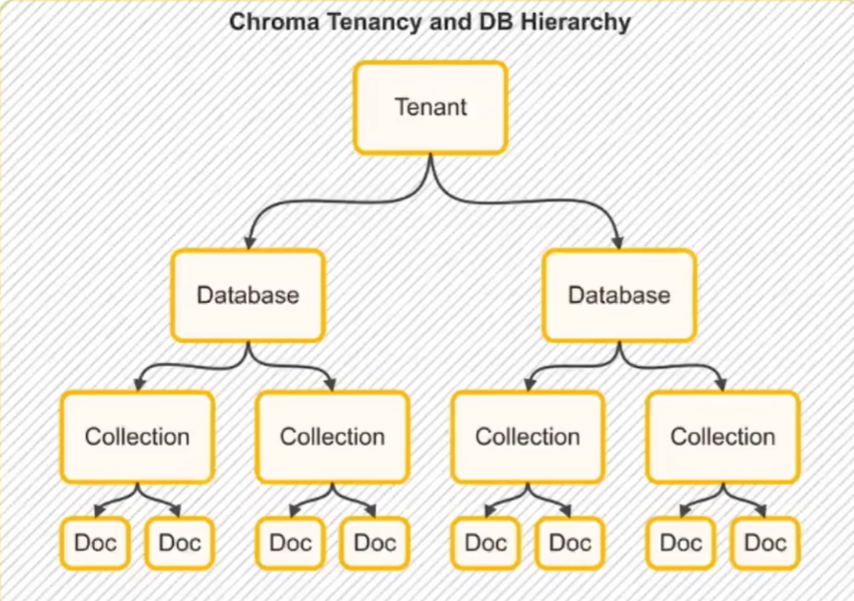

In [1]:
from langchain_chroma import vectorstores, Chroma
from langchain_openai import OpenAIEmbeddings
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
from langchain_core.documents import Document

# Create LangChain Documents for IPL players

doc1 = Document(
        page_content="Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.",
        metadata={"team": "Royal Challengers Bangalore"}
    )
doc2 = Document(
        page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
        metadata={"team": "Mumbai Indians"}
    )
doc3 = Document(
        page_content="MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.",
        metadata={"team": "Chennai Super Kings"}
    )
doc4 = Document(
        page_content="Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.",
        metadata={"team": "Mumbai Indians"}
    )
doc5 = Document(
        page_content="Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.",
        metadata={"team": "Chennai Super Kings"}
    )

In [4]:
docs = [doc1, doc2, doc3, doc4, doc5]

In [5]:
docs

[Document(metadata={'team': 'Royal Challengers Bangalore'}, page_content='Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.'),
 Document(metadata={'team': 'Mumbai Indians'}, page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure."),
 Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
 Document(metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
 Document(metadata={'team': 'Che

In [6]:
vector_store = Chroma(
    embedding_function=OpenAIEmbeddings(
        api_key=os.getenv('OPEN_AI_KEY'),
        model="text-embedding-3-large",
        base_url="https://openrouter.ai/api/v1",
    ),

    persist_directory='chroma_db',
    collection_name='sample',
)

In [7]:
# add document
vector_store.add_documents(docs)

['0d4b7674-a8d1-4ac9-adee-8809fc321026',
 '0efe4e15-4a69-4dce-a302-e1044f7ea573',
 'e232f6bd-3302-4e9d-bcbd-63d5e3320d5b',
 '4a08f447-8b67-48ce-98f8-f4d9a4ffc365',
 '14869159-2b5c-4355-bdf9-4be70e96da9f']

In [8]:
# view_documents
vector_store.get(include=['embeddings', 'documents', 'metadatas'])

{'ids': ['0d4b7674-a8d1-4ac9-adee-8809fc321026',
  '0efe4e15-4a69-4dce-a302-e1044f7ea573',
  'e232f6bd-3302-4e9d-bcbd-63d5e3320d5b',
  '4a08f447-8b67-48ce-98f8-f4d9a4ffc365',
  '14869159-2b5c-4355-bdf9-4be70e96da9f'],
 'embeddings': array([[ 0.00560399, -0.02314413, -0.01429669, ...,  0.0209353 ,
         -0.0138355 ,  0.01247623],
        [-0.00121904, -0.03855425, -0.01533788, ...,  0.00105964,
         -0.00459777,  0.00201302],
        [ 0.06533306, -0.04092675, -0.01558461, ..., -0.0054465 ,
         -0.00450132, -0.01144202],
        [-0.00968686, -0.02968478, -0.01195252, ..., -0.0001826 ,
         -0.00672185,  0.01035153],
        [ 0.0091211 , -0.02845641, -0.01652192, ...,  0.0124004 ,
          0.00943171, -0.01972356]], shape=(5, 3072)),
 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.',
  "Rohit Sharma is the m

In [9]:
# search documents
vector_store.similarity_search(
    query="Who among these are a bowler ?",
    k=2,

)

[Document(id='4a08f447-8b67-48ce-98f8-f4d9a4ffc365', metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
 Document(id='14869159-2b5c-4355-bdf9-4be70e96da9f', metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.')]

In [10]:
# search with similarity score

vector_store.similarity_search_with_score(
    query="Who among these are a bowler ?",
    k=2,
)

[(Document(id='4a08f447-8b67-48ce-98f8-f4d9a4ffc365', metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
  1.1274327039718628),
 (Document(id='14869159-2b5c-4355-bdf9-4be70e96da9f', metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.'),
  1.3337675333023071)]

In [11]:
# meta-data filtering
vector_store.similarity_search_with_score(
    query="",
    filter={"team": "Chennai Super Kings"},
)

[(Document(id='e232f6bd-3302-4e9d-bcbd-63d5e3320d5b', metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
  1.8510899543762207),
 (Document(id='14869159-2b5c-4355-bdf9-4be70e96da9f', metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.'),
  1.9104745388031006)]

In [15]:
# update the Documents

updated_doc1 = Document(
    page_content="Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
    metadata={"team": "Royal Challengers Bangalore"}
)


In [17]:
vector_store.update_document(document_id="0d4b7674-a8d1-4ac9-adee-8809fc321026", document=updated_doc1)

In [18]:
# view document
vector_store.get()

{'ids': ['0d4b7674-a8d1-4ac9-adee-8809fc321026',
  '0efe4e15-4a69-4dce-a302-e1044f7ea573',
  'e232f6bd-3302-4e9d-bcbd-63d5e3320d5b',
  '4a08f447-8b67-48ce-98f8-f4d9a4ffc365',
  '14869159-2b5c-4355-bdf9-4be70e96da9f'],
 'embeddings': None,
 'documents': ["Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
  "Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
  'MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to 

In [19]:
# delete documents
vector_store.delete(ids=['0d4b7674-a8d1-4ac9-adee-8809fc321026'])

In [20]:
# view document
vector_store.get(include=['embeddings', 'documents', 'metadatas'])

{'ids': ['0efe4e15-4a69-4dce-a302-e1044f7ea573',
  'e232f6bd-3302-4e9d-bcbd-63d5e3320d5b',
  '4a08f447-8b67-48ce-98f8-f4d9a4ffc365',
  '14869159-2b5c-4355-bdf9-4be70e96da9f'],
 'embeddings': array([[-0.00121904, -0.03855425, -0.01533788, ...,  0.00105964,
         -0.00459777,  0.00201302],
        [ 0.06533306, -0.04092675, -0.01558461, ..., -0.0054465 ,
         -0.00450132, -0.01144202],
        [-0.00968686, -0.02968478, -0.01195252, ..., -0.0001826 ,
         -0.00672185,  0.01035153],
        [ 0.0091211 , -0.02845641, -0.01652192, ...,  0.0124004 ,
          0.00943171, -0.01972356]], shape=(4, 3072)),
 'documents': ["Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
  'MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.',
  'Jasprit Bumrah i